In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Mapear os rótulos numéricos para nomes de espécies para melhor legibilidade
target_names = iris.target_names
y_named = y.map(lambda x: target_names[x])

print("Primeiras 5 linhas do dataset Iris (features):")
print(X.head())
print("\nPrimeiras 5 linhas do dataset Iris (target - espécies):")
print(y_named.head())

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_named, test_size=0.2, random_state=42)

print(f"\nTamanho do conjunto de treino: {len(X_train)} amostras")
print(f"Tamanho do conjunto de teste: {len(X_test)} amostras")

Primeiras 5 linhas do dataset Iris (features):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Primeiras 5 linhas do dataset Iris (target - espécies):
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
dtype: object

Tamanho do conjunto de treino: 120 amostras
Tamanho do conjunto de teste: 30 amostras


In [3]:
import automlx as automlx
from automlx import init 
from automlx import AutoClassifier  

automl = AutoClassifier()  # Desativa paralelismo
# O método .fit() inicia o processo de busca do melhor modelo

#est1 = automlx.Pipeline(task = 'classification', model_list=['DecisionTreeClassifier']) # Cria um pipeline de automação de machine learning para classificação
model = automl.fit(X_train, y_train) # Treina o modelo com os dados de treino




[2025-08-06 01:00:42,318] [automlx.backend] Overwriting ray session directory to C:/Users/JORGEB~1/AppData/Local/Temp/2qlyg_e9\ray, which will be deleted at engine shutdown. If you wish to retain ray logs, provide _temp_dir in ray_setup dict of engine_opts when initializing the AutoMLx engine.
[2025-08-06 01:00:55,271] [automlx.interface] Dataset shape: (120,4)
[2025-08-06 01:00:55,390] [automlx.data_transform] Running preprocessing. Number of features: 5
[2025-08-06 01:00:55,632] [automlx.data_transform] Preprocessing completed. Took 0.242 secs
[2025-08-06 01:00:55,654] [automlx.process] Running Model Generation
[2025-08-06 01:00:55,694] [automlx] Provided model (TorchMLPClassifier) is not supported.Supported models are: ['CatBoostClassifier', 'LGBMClassifier', 'SVC', 'AdaBoostClassifier', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GaussianNB', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'LinearSVC', 'LogisticRegressionClassifier', 'RandomForestClassifier', 'XGBClass

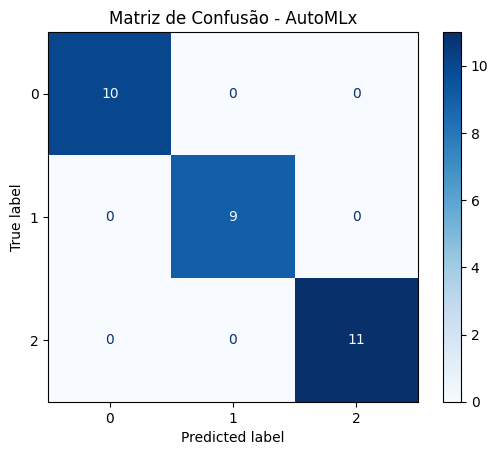

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Faz previsões com o modelo treinado
y_pred = model.predict(X_test)

# Gera a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibe a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusão - AutoMLx")
plt.show()



In [ ]:
automl.completed_trials_summary_
# Exibe o resumo dos trials concluídos


,Step,# Samples,# Features,Algorithm,Hyperparameters,Score (neg_log_loss),All Metrics,Runtime (Seconds),Memory Usage (GB),Finished
0,Model Selection,"{1: 96, 5: 96, 2: 96, 3: 96, 4: 96}",4,ExtraTreesClassifier,"{'n_estimators': 100, 'min_samples_split': 0.0...",-0.127043,{'neg_log_loss': -0.12704327046293137},2.700512,0.251110,Wed Aug 6 01:01:12 2025
1,Model Selection,"{1: 96, 2: 96, 3: 96, 4: 96, 5: 96}",4,RandomForestClassifier,"{'n_estimators': 100, 'min_samples_split': 0.0...",-0.129726,{'neg_log_loss': -0.129725593846674},1.650614,0.267174,Wed Aug 6 01:01:14 2025
2,Model Selection,"{1: 96, 2: 96, 3: 96, 4: 96, 5: 96}",4,GaussianNB,{},-0.157324,{'neg_log_loss': -0.15732372273410994},0.632096,0.251068,Wed Aug 6 01:01:12 2025
3,Model Selection,"{1: 96, 2: 96, 3: 96, 4: 96, 5: 96}",4,LGBMClassifier,"{'num_leaves': 31, 'boosting_type': 'gbdt', 'l...",-0.206399,{'neg_log_loss': -0.20639932361964028},2.516119,0.267078,Wed Aug 6 01:01:13 2025
4,Model Selection,"{1: 96, 2: 96, 3: 96, 4: 96, 5: 96}",4,XGBClassifier,"{'learning_rate': 0.1, 'min_child_weight': 1, ...",-0.214263,{'neg_log_loss': -0.21426286315567927},0.903459,0.280151,Wed Aug 6 01:01:14 2025
...,...,...,...,...,...,...,...,...,...,...
82,Model Tuning,"{1: 96, 2: 96, 3: 96, 4: 96, 5: 96}",3,ExtraTreesClassifier,"{'n_estimators': 5, 'min_samples_split': 0.016...",-0.977488,{'neg_log_loss': -0.977487920283312},0.730386,0.281879,Wed Aug 6 01:01:32 2025
83,Model Tuning,"{1: 96, 2: 96, 3: 96, 4: 96, 5: 96}",3,ExtraTreesClassifier,"{'n_estimators': 5, 'min_samples_split': 0.016...",-0.977488,{'neg_log_loss': -0.977487920283312},0.787620,0.281742,Wed Aug 6 01:01:27 2025
84,Model Tuning,"{1: 96, 2: 96, 3: 96, 4: 96, 5: 96}",3,ExtraTreesClassifier,"{'n_estimators': 5, 'min_samples_split': 0.016...",-0.977488,{'neg_log_loss': -0.977487920283312},0.841030,0.282188,Wed Aug 6 01:01:28 2025
85,Model Tuning,"{1: 96, 2: 96, 3: 96, 4: 96, 5: 96}",3,ExtraTreesClassifier,"{'n_estimators': 5, 'min_samples_split': 0.016...",-0.977488,{'neg_log_loss': -0.977487920283312},0.716621,0.282215,Wed Aug 6 01:01:28 2025


In [16]:
automl.n_jobs_

1